###**Welcome**###

##**Part 1: Cluster Analysis**##

In [2]:
from google.colab import files

uploaded = files.upload()

Saving imdb_dataset.csv to imdb_dataset.csv


In [3]:
import pandas as pd
import os
import numpy as np

df = pd.read_csv('imdb_dataset.csv')

df.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [4]:
df

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [5]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

###**1.1 - Partitioning the data into logical groupings**###

The purpose of clustering and classification algorithms is to make sense of and 
extract value from large sets of structured and unstructured data. If you’re working 
with huge volumes of unstructured data, it only makes sense to try to partition the 
data into some sort of logical groupings before attempting to analyze it.

In [6]:
print(df['title_type'].unique())
print(len(df['title_type'].unique()))

['Feature Film' 'Documentary' 'TV Movie']
3


In [ ]:
print(df['genre'].unique())
print(len(df['genre'].unique()))

['Drama' 'Comedy' 'Horror' 'Documentary' 'Action & Adventure'
 'Art House & International' 'Musical & Performing Arts'
 'Mystery & Suspense' 'Animation' 'Science Fiction & Fantasy' 'Other']
11


In [ ]:
df_sort = df.sort_values(by='genre',ascending=True)
df_sort

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
251,252,The Black Stallion,Feature Film,Action & Adventure,118.0,G,Twentieth Century Fox Home Entertainment,1979,10,17,...,no,no,Carroll Ballard,Kelly Reno,Mickey Rooney,Teri Garr,Clarence Muse,Hoyt Axton,http://www.imdb.com/title/tt0078872/,//www.rottentomatoes.com/m/black_stallion/
599,600,Astro Boy (AstroBoy),Feature Film,Action & Adventure,94.0,PG,Summit Entertainment,2009,10,23,...,no,no,David Bowers,Freddie Highmore,Nicolas Cage,Kristen Bell,Nathan Lane,Eugene Levy,http://www.imdb.com/title/tt0375568/,//www.rottentomatoes.com/m/astro_boy/
407,408,Dance Flick,Feature Film,Action & Adventure,83.0,PG-13,Paramount Studios,2009,5,22,...,no,no,Damien Wayans,Essence Atkins,Shawn Wayans,Shoshanna Bush,Marlon Wayans,Damon Wayans Jr.,http://www.imdb.com/title/tt1153706/,//www.rottentomatoes.com/m/dance_flick/
603,604,Jaws 2,Feature Film,Action & Adventure,116.0,PG,MCA Universal Home Video,1978,6,16,...,no,no,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Joe Mascolo,http://www.imdb.com/title/tt0077766/,//www.rottentomatoes.com/m/jaws_2/
162,163,Red Dawn,Feature Film,Action & Adventure,114.0,PG-13,MGM/UA,1984,8,10,...,no,no,John Milius,Patrick Swayze,C. Thomas Howell,Ron O'Neal,Lea Thompson,Jennifer Grey,http://www.imdb.com/title/tt0087985/,//www.rottentomatoes.com/m/1017321-red_dawn/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,Alligator,Feature Film,Science Fiction & Fantasy,91.0,R,Group 1,1980,1,1,...,no,no,Lewis Teague,Robert Forster,Robin Riker,Michael Vincente Gazzo,Perry Lang,Jack Carter,http://www.imdb.com/title/tt0080354/,//www.rottentomatoes.com/m/alligator/
520,521,"Oh, God!",Feature Film,Science Fiction & Fantasy,98.0,PG,Warner Home Video,1977,10,7,...,no,no,Carl Reiner,George Burns,John Denver,Teri Garr,Donald Pleasence,Ralph Bellamy,http://www.imdb.com/title/tt0076489/,//www.rottentomatoes.com/m/oh_god/
502,503,Galaxina,Feature Film,Science Fiction & Fantasy,95.0,R,Crown International Pictures,1980,6,6,...,no,no,William Sachs,Stephen Macht,Dorothy Stratten,Avery Schreiber,James David Hinton,Ronald J. Knight,http://www.imdb.com/title/tt0080771/,//www.rottentomatoes.com/m/galaxina/
301,302,Apollo 18,Feature Film,Science Fiction & Fantasy,86.0,PG-13,The Weinstein Company,2011,9,2,...,no,no,Gonzalo Lopez-Gallego,Warren Christie,Lloyd Owen,Ryan Robbins,Michael Kopsa,Andrew Airlie,http://www.imdb.com/title/tt1772240/,//www.rottentomatoes.com/m/apollo_18/


In [ ]:
dfc = df_sort.drop('Unnamed: 0', axis=1)
dfc = df_sort.drop('title', axis=1)
dfc = df_sort.drop('imdb_url', axis=1)
dfc = df_sort.drop('rt_url', axis=1)
dfc = dfc.iloc[: , :-1]
dfc.drop(dfc.columns[0], axis=1, inplace=True)
dfc

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,The Black Stallion,Feature Film,Action & Adventure,118.0,G,Twentieth Century Fox Home Entertainment,1979,10,17,1997.0,...,no,no,no,no,Carroll Ballard,Kelly Reno,Mickey Rooney,Teri Garr,Clarence Muse,Hoyt Axton
599,Astro Boy (AstroBoy),Feature Film,Action & Adventure,94.0,PG,Summit Entertainment,2009,10,23,2010.0,...,yes,no,no,no,David Bowers,Freddie Highmore,Nicolas Cage,Kristen Bell,Nathan Lane,Eugene Levy
407,Dance Flick,Feature Film,Action & Adventure,83.0,PG-13,Paramount Studios,2009,5,22,2009.0,...,no,no,no,no,Damien Wayans,Essence Atkins,Shawn Wayans,Shoshanna Bush,Marlon Wayans,Damon Wayans Jr.
603,Jaws 2,Feature Film,Action & Adventure,116.0,PG,MCA Universal Home Video,1978,6,16,2001.0,...,no,no,no,no,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Joe Mascolo
162,Red Dawn,Feature Film,Action & Adventure,114.0,PG-13,MGM/UA,1984,8,10,2001.0,...,no,no,no,no,John Milius,Patrick Swayze,C. Thomas Howell,Ron O'Neal,Lea Thompson,Jennifer Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Alligator,Feature Film,Science Fiction & Fantasy,91.0,R,Group 1,1980,1,1,2007.0,...,no,no,no,no,Lewis Teague,Robert Forster,Robin Riker,Michael Vincente Gazzo,Perry Lang,Jack Carter
520,"Oh, God!",Feature Film,Science Fiction & Fantasy,98.0,PG,Warner Home Video,1977,10,7,2002.0,...,no,no,no,no,Carl Reiner,George Burns,John Denver,Teri Garr,Donald Pleasence,Ralph Bellamy
502,Galaxina,Feature Film,Science Fiction & Fantasy,95.0,R,Crown International Pictures,1980,6,6,2000.0,...,no,no,no,no,William Sachs,Stephen Macht,Dorothy Stratten,Avery Schreiber,James David Hinton,Ronald J. Knight
301,Apollo 18,Feature Film,Science Fiction & Fantasy,86.0,PG-13,The Weinstein Company,2011,9,2,2011.0,...,no,no,no,no,Gonzalo Lopez-Gallego,Warren Christie,Lloyd Owen,Ryan Robbins,Michael Kopsa,Andrew Airlie


In [ ]:
df_split_1 = dfc["genre"] == 'Action & Adventure'
df_split_2 = dfc["genre"] == 'Animation'
df_split_3 = dfc["genre"] == 'Art House & International'
df_split_4 = dfc["genre"] == 'Comedy'
df_split_5 = dfc["genre"] == 'Documentary'
df_split_6 = dfc["genre"] == 'Drama'
df_split_7 = dfc["genre"] == 'Horror'
df_split_8 = dfc["genre"] == 'Musical & Performing Arts'
df_split_9 = dfc["genre"] == 'Mystery & Suspense'
df_split_10 = dfc["genre"] == 'Other'
df_split_11 = dfc["genre"] == 'Science Fiction & Fantasy'

###**1.2 - KMeans and Hierarchical Analysis Setup**###

You have to perform KMeans and Hierarchical analysis on the IMDB dataset (refer 
to 1. In the resources below). The goal is to put all the movies that share some 
common characteristics in one cluster.

####**KMeans**####

In [ ]:
dfa = dfc
dfa

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,The Black Stallion,Feature Film,Action & Adventure,118.0,G,Twentieth Century Fox Home Entertainment,1979,10,17,1997.0,...,no,no,no,no,Carroll Ballard,Kelly Reno,Mickey Rooney,Teri Garr,Clarence Muse,Hoyt Axton
599,Astro Boy (AstroBoy),Feature Film,Action & Adventure,94.0,PG,Summit Entertainment,2009,10,23,2010.0,...,yes,no,no,no,David Bowers,Freddie Highmore,Nicolas Cage,Kristen Bell,Nathan Lane,Eugene Levy
407,Dance Flick,Feature Film,Action & Adventure,83.0,PG-13,Paramount Studios,2009,5,22,2009.0,...,no,no,no,no,Damien Wayans,Essence Atkins,Shawn Wayans,Shoshanna Bush,Marlon Wayans,Damon Wayans Jr.
603,Jaws 2,Feature Film,Action & Adventure,116.0,PG,MCA Universal Home Video,1978,6,16,2001.0,...,no,no,no,no,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Joe Mascolo
162,Red Dawn,Feature Film,Action & Adventure,114.0,PG-13,MGM/UA,1984,8,10,2001.0,...,no,no,no,no,John Milius,Patrick Swayze,C. Thomas Howell,Ron O'Neal,Lea Thompson,Jennifer Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Alligator,Feature Film,Science Fiction & Fantasy,91.0,R,Group 1,1980,1,1,2007.0,...,no,no,no,no,Lewis Teague,Robert Forster,Robin Riker,Michael Vincente Gazzo,Perry Lang,Jack Carter
520,"Oh, God!",Feature Film,Science Fiction & Fantasy,98.0,PG,Warner Home Video,1977,10,7,2002.0,...,no,no,no,no,Carl Reiner,George Burns,John Denver,Teri Garr,Donald Pleasence,Ralph Bellamy
502,Galaxina,Feature Film,Science Fiction & Fantasy,95.0,R,Crown International Pictures,1980,6,6,2000.0,...,no,no,no,no,William Sachs,Stephen Macht,Dorothy Stratten,Avery Schreiber,James David Hinton,Ronald J. Knight
301,Apollo 18,Feature Film,Science Fiction & Fantasy,86.0,PG-13,The Weinstein Company,2011,9,2,2011.0,...,no,no,no,no,Gonzalo Lopez-Gallego,Warren Christie,Lloyd Owen,Ryan Robbins,Michael Kopsa,Andrew Airlie


In [ ]:
dfa = dfa.drop('title', axis=1)
dfa

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,Feature Film,Action & Adventure,118.0,G,Twentieth Century Fox Home Entertainment,1979,10,17,1997.0,9.0,...,no,no,no,no,Carroll Ballard,Kelly Reno,Mickey Rooney,Teri Garr,Clarence Muse,Hoyt Axton
599,Feature Film,Action & Adventure,94.0,PG,Summit Entertainment,2009,10,23,2010.0,3.0,...,yes,no,no,no,David Bowers,Freddie Highmore,Nicolas Cage,Kristen Bell,Nathan Lane,Eugene Levy
407,Feature Film,Action & Adventure,83.0,PG-13,Paramount Studios,2009,5,22,2009.0,9.0,...,no,no,no,no,Damien Wayans,Essence Atkins,Shawn Wayans,Shoshanna Bush,Marlon Wayans,Damon Wayans Jr.
603,Feature Film,Action & Adventure,116.0,PG,MCA Universal Home Video,1978,6,16,2001.0,5.0,...,no,no,no,no,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Joe Mascolo
162,Feature Film,Action & Adventure,114.0,PG-13,MGM/UA,1984,8,10,2001.0,5.0,...,no,no,no,no,John Milius,Patrick Swayze,C. Thomas Howell,Ron O'Neal,Lea Thompson,Jennifer Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Feature Film,Science Fiction & Fantasy,91.0,R,Group 1,1980,1,1,2007.0,9.0,...,no,no,no,no,Lewis Teague,Robert Forster,Robin Riker,Michael Vincente Gazzo,Perry Lang,Jack Carter
520,Feature Film,Science Fiction & Fantasy,98.0,PG,Warner Home Video,1977,10,7,2002.0,7.0,...,no,no,no,no,Carl Reiner,George Burns,John Denver,Teri Garr,Donald Pleasence,Ralph Bellamy
502,Feature Film,Science Fiction & Fantasy,95.0,R,Crown International Pictures,1980,6,6,2000.0,2.0,...,no,no,no,no,William Sachs,Stephen Macht,Dorothy Stratten,Avery Schreiber,James David Hinton,Ronald J. Knight
301,Feature Film,Science Fiction & Fantasy,86.0,PG-13,The Weinstein Company,2011,9,2,2011.0,12.0,...,no,no,no,no,Gonzalo Lopez-Gallego,Warren Christie,Lloyd Owen,Ryan Robbins,Michael Kopsa,Andrew Airlie


In [ ]:
encode_text_index(dfa,"title_type")

encode_text_index(dfa,"genre")
encode_text_index(dfa,"mpaa_rating")
encode_text_index(dfa,"studio")
encode_text_index(dfa,"director")
encode_text_index(dfa,"actor1")
encode_text_index(dfa,"actor2")
encode_text_index(dfa,"actor3")
encode_text_index(dfa,"actor4")
encode_text_index(dfa,"actor5")

encode_text_index(dfa,"critics_rating")
encode_text_index(dfa,"audience_rating")

encode_text_index(dfa,"best_pic_nom")
encode_text_index(dfa,"best_pic_win")
encode_text_index(dfa,"best_actor_win")
encode_text_index(dfa,"best_actress_win")
encode_text_index(dfa,"best_dir_win")
encode_text_index(dfa,"top200_box")
dfa

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,1,0,118.0,0,186,1979,10,17,1997.0,9.0,...,0,0,0,0,77,246,387,548,106,242
599,1,0,94.0,2,171,2009,10,23,2010.0,3.0,...,1,0,0,0,110,144,412,326,449,185
407,1,0,83.0,3,147,2009,5,22,2009.0,9.0,...,0,0,0,0,103,137,505,533,396,122
603,1,0,116.0,2,105,1978,6,16,2001.0,5.0,...,0,0,0,0,215,390,341,413,318,294
162,1,0,114.0,3,108,1984,8,10,2001.0,5.0,...,0,0,0,0,246,348,65,496,368,277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1,10,91.0,4,72,1980,1,1,2007.0,9.0,...,0,0,0,0,286,381,472,397,475,252
520,1,10,98.0,2,202,1977,10,7,2002.0,7.0,...,0,0,0,0,75,153,265,548,152,488
502,1,10,95.0,4,38,1980,6,6,2000.0,2.0,...,0,0,0,0,524,421,148,45,253,522
301,1,10,86.0,3,177,2011,9,2,2011.0,12.0,...,0,0,0,0,165,467,340,507,424,20


In [ ]:
print('Number of missing values:')
for col in dfa.columns:
    print('\t%s: %d' % (col,dfa[col].isna().sum()))
print('')

Number of missing values:
	title_type: 0
	genre: 0
	runtime: 1
	mpaa_rating: 0
	studio: 0
	thtr_rel_year: 0
	thtr_rel_month: 0
	thtr_rel_day: 0
	dvd_rel_year: 8
	dvd_rel_month: 8
	dvd_rel_day: 8
	imdb_rating: 0
	imdb_num_votes: 0
	critics_rating: 0
	critics_score: 0
	audience_rating: 0
	audience_score: 0
	best_pic_nom: 0
	best_pic_win: 0
	best_actor_win: 0
	best_actress_win: 0
	best_dir_win: 0
	top200_box: 0
	director: 0
	actor1: 0
	actor2: 0
	actor3: 0
	actor4: 0
	actor5: 0



In [ ]:
df2 = dfa.dropna()
df2
df2.shape

(642, 29)

In [ ]:
df2

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,1,0,118.0,0,186,1979,10,17,1997.0,9.0,...,0,0,0,0,77,246,387,548,106,242
599,1,0,94.0,2,171,2009,10,23,2010.0,3.0,...,1,0,0,0,110,144,412,326,449,185
407,1,0,83.0,3,147,2009,5,22,2009.0,9.0,...,0,0,0,0,103,137,505,533,396,122
603,1,0,116.0,2,105,1978,6,16,2001.0,5.0,...,0,0,0,0,215,390,341,413,318,294
162,1,0,114.0,3,108,1984,8,10,2001.0,5.0,...,0,0,0,0,246,348,65,496,368,277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1,10,91.0,4,72,1980,1,1,2007.0,9.0,...,0,0,0,0,286,381,472,397,475,252
520,1,10,98.0,2,202,1977,10,7,2002.0,7.0,...,0,0,0,0,75,153,265,548,152,488
502,1,10,95.0,4,38,1980,6,6,2000.0,2.0,...,0,0,0,0,524,421,148,45,253,522
301,1,10,86.0,3,177,2011,9,2,2011.0,12.0,...,0,0,0,0,165,467,340,507,424,20


In [ ]:
df3 = dfc
df3

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,The Black Stallion,Feature Film,Action & Adventure,118.0,G,Twentieth Century Fox Home Entertainment,1979,10,17,1997.0,...,no,no,no,no,Carroll Ballard,Kelly Reno,Mickey Rooney,Teri Garr,Clarence Muse,Hoyt Axton
599,Astro Boy (AstroBoy),Feature Film,Action & Adventure,94.0,PG,Summit Entertainment,2009,10,23,2010.0,...,yes,no,no,no,David Bowers,Freddie Highmore,Nicolas Cage,Kristen Bell,Nathan Lane,Eugene Levy
407,Dance Flick,Feature Film,Action & Adventure,83.0,PG-13,Paramount Studios,2009,5,22,2009.0,...,no,no,no,no,Damien Wayans,Essence Atkins,Shawn Wayans,Shoshanna Bush,Marlon Wayans,Damon Wayans Jr.
603,Jaws 2,Feature Film,Action & Adventure,116.0,PG,MCA Universal Home Video,1978,6,16,2001.0,...,no,no,no,no,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Joe Mascolo
162,Red Dawn,Feature Film,Action & Adventure,114.0,PG-13,MGM/UA,1984,8,10,2001.0,...,no,no,no,no,John Milius,Patrick Swayze,C. Thomas Howell,Ron O'Neal,Lea Thompson,Jennifer Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Alligator,Feature Film,Science Fiction & Fantasy,91.0,R,Group 1,1980,1,1,2007.0,...,no,no,no,no,Lewis Teague,Robert Forster,Robin Riker,Michael Vincente Gazzo,Perry Lang,Jack Carter
520,"Oh, God!",Feature Film,Science Fiction & Fantasy,98.0,PG,Warner Home Video,1977,10,7,2002.0,...,no,no,no,no,Carl Reiner,George Burns,John Denver,Teri Garr,Donald Pleasence,Ralph Bellamy
502,Galaxina,Feature Film,Science Fiction & Fantasy,95.0,R,Crown International Pictures,1980,6,6,2000.0,...,no,no,no,no,William Sachs,Stephen Macht,Dorothy Stratten,Avery Schreiber,James David Hinton,Ronald J. Knight
301,Apollo 18,Feature Film,Science Fiction & Fantasy,86.0,PG-13,The Weinstein Company,2011,9,2,2011.0,...,no,no,no,no,Gonzalo Lopez-Gallego,Warren Christie,Lloyd Owen,Ryan Robbins,Michael Kopsa,Andrew Airlie


In [ ]:
encode_text_index(df3,"title_type")

encode_text_index(df3,"genre")
encode_text_index(df3,"mpaa_rating")
encode_text_index(df3,"studio")
encode_text_index(df3,"director")
encode_text_index(df3,"actor1")
encode_text_index(df3,"actor2")
encode_text_index(df3,"actor3")
encode_text_index(df3,"actor4")
encode_text_index(df3,"actor5")

encode_text_index(df3,"critics_rating")
encode_text_index(df3,"audience_rating")

encode_text_index(df3,"best_pic_nom")
encode_text_index(df3,"best_pic_win")
encode_text_index(df3,"best_actor_win")
encode_text_index(df3,"best_actress_win")
encode_text_index(df3,"best_dir_win")
encode_text_index(df3,"top200_box")
df3

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,The Black Stallion,1,0,118.0,0,186,1979,10,17,1997.0,...,0,0,0,0,77,246,387,548,106,242
599,Astro Boy (AstroBoy),1,0,94.0,2,171,2009,10,23,2010.0,...,1,0,0,0,110,144,412,326,449,185
407,Dance Flick,1,0,83.0,3,147,2009,5,22,2009.0,...,0,0,0,0,103,137,505,533,396,122
603,Jaws 2,1,0,116.0,2,105,1978,6,16,2001.0,...,0,0,0,0,215,390,341,413,318,294
162,Red Dawn,1,0,114.0,3,108,1984,8,10,2001.0,...,0,0,0,0,246,348,65,496,368,277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Alligator,1,10,91.0,4,72,1980,1,1,2007.0,...,0,0,0,0,286,381,472,397,475,252
520,"Oh, God!",1,10,98.0,2,202,1977,10,7,2002.0,...,0,0,0,0,75,153,265,548,152,488
502,Galaxina,1,10,95.0,4,38,1980,6,6,2000.0,...,0,0,0,0,524,421,148,45,253,522
301,Apollo 18,1,10,86.0,3,177,2011,9,2,2011.0,...,0,0,0,0,165,467,340,507,424,20


In [ ]:
print('Number of missing values:')
for col in df3.columns:
    print('\t%s: %d' % (col,df3[col].isna().sum()))
print('')

Number of missing values:
	title: 0
	title_type: 0
	genre: 0
	runtime: 1
	mpaa_rating: 0
	studio: 0
	thtr_rel_year: 0
	thtr_rel_month: 0
	thtr_rel_day: 0
	dvd_rel_year: 8
	dvd_rel_month: 8
	dvd_rel_day: 8
	imdb_rating: 0
	imdb_num_votes: 0
	critics_rating: 0
	critics_score: 0
	audience_rating: 0
	audience_score: 0
	best_pic_nom: 0
	best_pic_win: 0
	best_actor_win: 0
	best_actress_win: 0
	best_dir_win: 0
	top200_box: 0
	director: 0
	actor1: 0
	actor2: 0
	actor3: 0
	actor4: 0
	actor5: 0



In [ ]:
df3 = df3.dropna()
df3
df3.shape

(642, 30)

In [ ]:
from sklearn import cluster

data = df2
k_means = cluster.KMeans(n_clusters=11, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=df3.title, columns=['Cluster ID'])

,Cluster ID
title,
The Black Stallion,0
Astro Boy (AstroBoy),6
Dance Flick,0
Jaws 2,10
Red Dawn,6
...,...
Alligator,0
"Oh, God!",0
Galaxina,0


In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,0.875723,4.679191,103.002890,3.491329,116.583815,1995.592486,6.309249,13.589595,2004.078035,6.265896,...,0.098266,0.095376,0.028902,-2.775558e-17,252.988439,243.453757,293.500000,308.552023,318.754335,316.395954
1,1.000000,4.956522,121.260870,3.434783,123.173913,2004.304348,7.521739,14.260870,2006.478261,7.130435,...,0.217391,0.173913,0.130435,8.695652e-02,296.217391,191.217391,240.826087,201.130435,298.000000,322.739130
2,1.000000,4.500000,121.250000,4.000000,139.500000,2004.250000,8.250000,11.750000,2005.000000,9.000000,...,0.000000,0.000000,0.250000,2.500000e-01,320.500000,315.500000,245.000000,333.500000,372.250000,220.250000
3,1.000000,4.536585,110.048780,3.317073,135.341463,2003.317073,7.292683,20.170732,2005.560976,6.804878,...,0.243902,0.195122,0.048780,0.000000e+00,282.975610,228.292683,272.951220,296.268293,309.365854,296.536585
4,1.000000,9.000000,165.000000,4.000000,176.000000,2012.000000,12.000000,25.000000,2013.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000e+00,385.000000,188.000000,96.000000,340.000000,209.000000,532.000000
5,1.000000,3.870968,109.709677,3.225806,139.419355,2001.290323,6.806452,13.129032,2004.580645,6.258065,...,0.161290,0.096774,0.032258,6.451613e-02,279.322581,225.612903,297.806452,315.290323,331.161290,277.838710
6,0.958763,4.329897,101.639175,3.226804,133.309278,2000.309278,7.381443,14.804124,2004.927835,6.164948,...,0.154639,0.113402,0.113402,1.030928e-02,293.164948,245.896907,296.113402,292.536082,293.536082,307.237113
7,1.000000,3.133333,112.200000,3.333333,146.133333,2000.133333,6.666667,15.866667,2004.400000,7.200000,...,0.133333,0.133333,0.200000,6.666667e-02,302.200000,310.466667,298.866667,285.066667,312.600000,321.133333
8,1.000000,5.666667,122.666667,3.166667,67.833333,1998.000000,8.000000,17.000000,2002.500000,3.500000,...,0.166667,0.166667,0.500000,3.333333e-01,222.833333,255.666667,116.000000,287.833333,301.666667,182.500000
9,1.000000,6.000000,152.166667,3.500000,125.000000,1999.166667,8.166667,17.333333,2007.166667,6.833333,...,0.166667,0.666667,0.333333,3.333333e-01,145.666667,190.166667,268.500000,316.666667,404.833333,396.000000


####**Hierarchical Analysis**####

In [ ]:
data

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
251,1,0,118.0,0,186,1979,10,17,1997.0,9.0,...,0,0,0,0,77,246,387,548,106,242
599,1,0,94.0,2,171,2009,10,23,2010.0,3.0,...,1,0,0,0,110,144,412,326,449,185
407,1,0,83.0,3,147,2009,5,22,2009.0,9.0,...,0,0,0,0,103,137,505,533,396,122
603,1,0,116.0,2,105,1978,6,16,2001.0,5.0,...,0,0,0,0,215,390,341,413,318,294
162,1,0,114.0,3,108,1984,8,10,2001.0,5.0,...,0,0,0,0,246,348,65,496,368,277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1,10,91.0,4,72,1980,1,1,2007.0,9.0,...,0,0,0,0,286,381,472,397,475,252
520,1,10,98.0,2,202,1977,10,7,2002.0,7.0,...,0,0,0,0,75,153,265,548,152,488
502,1,10,95.0,4,38,1980,6,6,2000.0,2.0,...,0,0,0,0,524,421,148,45,253,522
301,1,10,86.0,3,177,2011,9,2,2011.0,12.0,...,0,0,0,0,165,467,340,507,424,20


###**1.3 - Finding the optimum number of clusters for KMeans**###

For KMeans you will first have to find the optimum number of cluster by plotting 
the SSE vs # of Clusters (Elbow method) and then proceed with applying KMeans.

Text(0, 0.5, 'SSE')

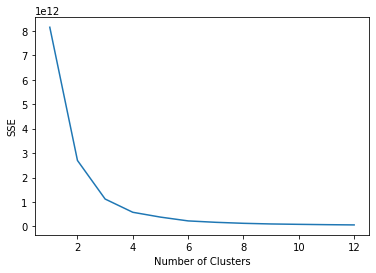

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8,9,10,11,12]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Based on the results above, the optimum number of clusters is apparently 3. Seeing how the "elbow" in the plot of SSE versus the number of clusters can be used to estimate the number of clusters.

In [ ]:
from sklearn import cluster

data = df2
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=df3.title, columns=['Cluster ID'])

,Cluster ID
title,
The Black Stallion,0
Astro Boy (AstroBoy),0
Dance Flick,0
Jaws 2,0
Red Dawn,0
...,...
Alligator,0
"Oh, God!",0
Galaxina,0


In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,0.915315,4.580180,103.981982,3.392793,123.747748,1997.509910,6.645045,14.374775,2004.302703,6.304505,...,0.140541,0.104505,0.054054,0.009009,266.769369,244.140541,291.850450,304.783784,307.814414,312.753153
1,1.000000,4.256757,114.918919,3.297297,132.756757,2002.000000,7.148649,14.310811,2005.094595,6.513514,...,0.175676,0.135135,0.108108,0.094595,291.121622,235.256757,266.972973,267.743243,315.500000,293.824324
2,1.000000,5.230769,138.000000,3.769231,123.384615,2000.461538,8.307692,16.384615,2005.615385,6.923077,...,0.153846,0.307692,0.384615,0.230769,218.846154,242.153846,225.538462,327.461538,380.384615,335.076923


###**1.4 - Applying algorithms and displaying dendograms for hierarchical clustering**###

For hierarchical clustering, apply single, complete and average link and display the
dendogram (the plot that visualizes the hierarchy).

####**Single Link (Min)**####

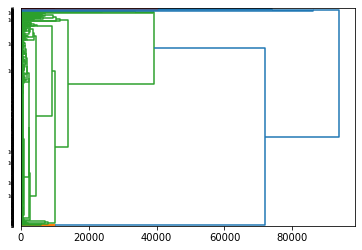

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

genres = data['genre']
Y = data['title_type']
X = data.drop(['genre','title_type'],axis=1)
#Z = hierarchy.linkage(X.as_matrix(), 'single')
Z = hierarchy.linkage(X.values, 'single')
#Z = hierarchy.linkage(X, 'single')
dn = hierarchy.dendrogram(Z,labels=genres.tolist(),orientation='right')

####**Complete Link (Max)**####

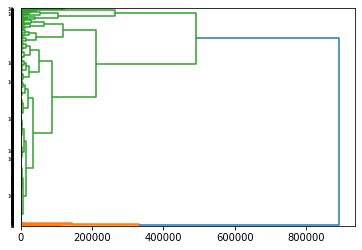

In [ ]:
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z,labels = genres.tolist(), orientation='right')

####**Group Average**####

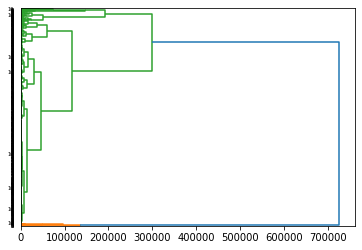

In [ ]:
Z = hierarchy.linkage(X, 'average')
dn = hierarchy.dendrogram(Z,labels = genres.tolist(), orientation='right')

##**Part 2: Text Mining**##

To make sense of the text and make it useful for various ML techniques, we will first create a count vector and then a tfidf vector on the following dataset:

In [ ]:
corpus = [ 'Now for manners use has company believe parlors.', 
          'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.', 
          'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.', 
          'Principle oh explained excellent do my suspected conveying in.', 
          'Excellent you did therefore perfectly supposing described. ', 
          'Its had resolving otherwise she contented therefore.', 
          'Afford relied warmth out sir hearts sister use garden.', 
          'Men day warmth formed admire former simple.', 
          'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' , 
          'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']


###**2.1 - Creating a Count Vector**###

We begin by creating a count vector, where the rows represent the text and the columns represent the words. The values in the matrix are the number of occurences of the word in the text.

In [ ]:
import sklearn.feature_extraction.text as sk_text
vectorizer = sk_text.CountVectorizer(min_df=1)
matrix = vectorizer.fit_transform(corpus)
print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array
print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 

###**2.2 - Creating a TF-IDF Vector**###

We then create a tfidf vector where the rows are once again the text and the columns are the words. The values here are the tfidf values.

In [ ]:
vectorizer = sk_text.TfidfVectorizer(min_df=1)
matrix = vectorizer.fit_transform(corpus)
print(type(matrix))               # Compressed Sparse Row matrix
tfidf_data = matrix.toarray()     #  convert it to numpy array
print(tfidf_data)
print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.36386176 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.         0.         0.36386176
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27061472 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.215

We can narrow down the feature names by increasing the min_df. This will return a smaller list where terms with a document frequency < min_df are ignored.

In [ ]:
vectorizer = sk_text.TfidfVectorizer(
                             min_df=2, 
                             )

matrix = vectorizer.fit_transform(corpus)
print(type(matrix))               # Compressed Sparse Row matrix
tfidf_data = matrix.toarray()     #  convert it to numpy array

print(tfidf_data)
print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.        ]
 [0.         0.75262077 0.         0.         0.         0.
  0.         0.         0.65845424 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.65845424 0.75262077]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.57735027]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]

###**2.3 - Explaining the usage of tfidf**###

Tf-idf returns a value that reflects the significance of a word in a document. The value increases in proportion to the number of times a word appears in the document and is inversely proportional to the number of documents that contain the same word.
This inverse effect adjusts for the fact that some words, such as the word "the",  may appear frequently in a document, but provide no significance, since it is a word that appears very frequently in general.

##**Part 3: Artificial Neural Network**##

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

###**3.0 - Attribute Value Binarization**###


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
    

Number of duplicate rows = 0
Number of rows before discarding duplicates = 10000
Number of rows after discarding duplicates = 10000
Number of missing values:
	RowNumber: 0
	CustomerId: 0
	Surname: 0
	CreditScore: 0
	Geography: 0
	Gender: 0
	Age: 0
	Tenure: 0
	Balance: 0
	NumOfProducts: 0
	HasCrCard: 0
	IsActiveMember: 0
	EstimatedSalary: 0
	Exited: 0


In [ ]:
df_c = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1)
df_c

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


Once we have checked for duplicates, missing values, and dropped unnecessary columns, we can begin the normalization, or binarization, of the numerical and categorical values.
For the normalization of numerical values X that takes values in the range [a, b] where a < b, we normalize the measurements by subtracting a and dividing by b − a. For the categorical values of the column 'Gender', we can encode Male/Female to 0 or 1.

In [ ]:
df_c['CreditScore'] = (df_c['CreditScore'] - df_c['CreditScore'].min()) / (df_c['CreditScore'].max() - df_c['CreditScore'].min())  
df_c['Age'] = (df_c['Age'] - df_c['Age'].min()) / (df_c['Age'].max() - df_c['Age'].min())
df_c['Tenure'] = (df_c['Tenure'] - df_c['Tenure'].min()) / (df_c['Tenure'].max() - df_c['Tenure'].min()) 
df_c['Balance'] = (df_c['Balance'] - df_c['Balance'].min()) / (df_c['Balance'].max() - df_c['Balance'].min())
df_c['NumOfProducts'] = (df_c['NumOfProducts'] - df_c['NumOfProducts'].min()) / (df_c['NumOfProducts'].max() - df_c['NumOfProducts'].min())
df_c['EstimatedSalary'] = (df_c['EstimatedSalary'] - df_c['EstimatedSalary'].min()) / (df_c['EstimatedSalary'].max() - df_c['EstimatedSalary'].min())
encode_text_index(df_c, 'Gender')

df_c

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


###**3.1 - ANN**###

In [ ]:
from sklearn.model_selection import train_test_split
B = df_c[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

x_train, x_test, y_train, y_test = train_test_split(B, B, test_size=0.2, random_state=45)

x_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4132,0.380,0,0.135135,0.6,0.335280,0.000000,0,1,0.403473,0
6553,0.576,1,0.432432,0.1,0.409112,0.000000,1,0,0.841822,1
7604,0.682,0,0.567568,0.6,0.402836,0.000000,1,0,0.886806,1
585,0.820,0,0.445946,0.2,0.402341,0.000000,0,0,0.898102,1
5924,0.776,0,0.283784,0.1,0.376390,0.333333,0,1,0.947187,0
...,...,...,...,...,...,...,...,...,...,...
193,0.502,1,0.189189,0.8,0.370720,0.000000,1,0,0.434771,0
7500,0.688,1,0.391892,0.4,0.000000,0.333333,1,0,0.987680,0
2949,0.338,1,0.283784,0.4,0.445998,0.000000,1,1,0.487875,0
9842,0.576,1,0.162162,0.9,0.545275,0.333333,1,1,0.533208,0


In [ ]:
X,Y = to_xy(df_c,'Exited')
testX, testY = to_xy(x_test,'Exited')

print(X.shape)
print(Y.shape)
Y

(10000, 9)
(10000, 2)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Epoch 1/100
313/313 - 1s - loss: 0.4948 - 959ms/epoch - 3ms/step
Epoch 2/100
313/313 - 1s - loss: 0.4723 - 625ms/epoch - 2ms/step
Epoch 3/100
313/313 - 1s - loss: 0.4563 - 625ms/epoch - 2ms/step
Epoch 4/100
313/313 - 1s - loss: 0.4422 - 628ms/epoch - 2ms/step
Epoch 5/100
313/313 - 1s - loss: 0.4339 - 626ms/epoch - 2ms/step
Epoch 6/100
313/313 - 1s - loss: 0.4277 - 614ms/epoch - 2ms/step
Epoch 7/100
313/313 - 1s - loss: 0.4226 - 619ms/epoch - 2ms/step
Epoch 8/100
313/313 - 1s - loss: 0.4175 - 623ms/epoch - 2ms/step
Epoch 9/100
313/313 - 1s - loss: 0.4126 - 621ms/epoch - 2ms/step
Epoch 10/100
313/313 - 1s - loss: 0.4066 - 619ms/epoch - 2ms/step
Epoch 11/100
313/313 - 1s - loss: 0.3990 - 606ms/epoch - 2ms/step
Epoch 12/100
313/313 - 1s - loss: 0.3925 - 623ms/epoch - 2ms/step
Epoch 13/100
313/313 - 1s - loss: 0.3852 - 618ms/epoch - 2ms/step
Epoch 14/100
313/313 - 1s - loss: 0.3792 - 606ms/epoch - 2ms/step
Epoch 15/100
313/313 - 1s - loss: 0.3767 - 615ms/epoch - 2ms/step
Epoch 16/100
313/31

In [ ]:
pred = model.predict(testX)
print(pred[0])

63/63 [==============================] - 0s 1ms/step
[0.91223985 0.08776017]


In [ ]:
pred = np.argmax(pred, axis=1)

true = np.argmax(testY, axis=1)

In [ ]:
Exited = encode_text_index(df_c,'Exited')
Exited[pred]

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.86


In [ ]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1581
           1       0.80      0.42      0.55       419

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



###**3.2 - Accuracy comparison with other classification models**###

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import os
import numpy as np

df = pd.read_csv('Churn_Modelling.csv')

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of duplicate rows = 0
Number of rows before discarding duplicates = 10000
Number of rows after discarding duplicates = 10000


In [ ]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
print('')

Number of missing values:
	RowNumber: 0
	CustomerId: 0
	Surname: 0
	CreditScore: 0
	Geography: 0
	Gender: 0
	Age: 0
	Tenure: 0
	Balance: 0
	NumOfProducts: 0
	HasCrCard: 0
	IsActiveMember: 0
	EstimatedSalary: 0
	Exited: 0



In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

from sklearn.model_selection import train_test_split

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import os
import pandas as pd
import numpy as np

#path = ""

#filename_read = os.path.join(path,"preprocessed_titanic.csv")
#passenger_age_survival = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(df.columns))
df.drop('RowNumber', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)

print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
After drop: Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
encode_text_index(df,"Geography")   # label encoding
encode_text_index(df,"Gender")   # label encoding

df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dfc = df
dfc.drop('CustomerId', axis=1, inplace=True)
dfc

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


####**ML Model**####

In [ ]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing
from scipy.stats import zscore

df['CreditScore_z_score'] = zscore(df['CreditScore'])
df['BalanceScore_z_score'] = zscore(df['Balance'])
df['SalaryScore_z_score'] = zscore(df['EstimatedSalary'])
df['Age_z_score'] = zscore(df['Age'])
df['Tenure_z_score'] = zscore(df['Tenure'])

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df[['CreditScore_z_score', 'Age_z_score', 'Tenure_z_score','BalanceScore_z_score','SalaryScore_z_score']]
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,CreditScore_z_score,Age_z_score,Tenure_z_score,BalanceScore_z_score,SalaryScore_z_score
6252,-0.564197,-0.660018,-0.695982,0.324119,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,0.253524
...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.405759


In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


In [ ]:
dfc = df
dfc.drop('EstimatedSalary', axis=1, inplace=True)
dfc.drop('Balance', axis=1, inplace=True)
dfc.drop('Age', axis=1, inplace=True)
dfc.drop('Tenure', axis=1, inplace=True)
dfc.drop('CreditScore', axis=1, inplace=True)
dfc

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,0,0,1,1,1,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,2,0,1,0,1,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,0,0,3,1,0,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,0,0,2,0,0,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,2,0,1,1,1,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2,1,0,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,0,1,1,1,1,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,0,0,1,0,1,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,1,1,2,1,0,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


In [ ]:
x,y = to_xy(df,'Exited')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
print('Tensor Flow Version: {}'.format(tf.__version__))

Tensor Flow Version: 2.9.2


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(16, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu')) # Hidden 2
model.add(Dense(4, activation='relu')) # Hidden 2
model.add(Dense(2, activation='softmax')) # Output

#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
model.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
250/250 - 2s - loss: 0.6376 - val_loss: 0.5772 - 2s/epoch - 7ms/step
Epoch 2/100
250/250 - 1s - loss: 0.5391 - val_loss: 0.4973 - 597ms/epoch - 2ms/step
Epoch 3/100
250/250 - 1s - loss: 0.4798 - val_loss: 0.4565 - 644ms/epoch - 3ms/step
Epoch 4/100
250/250 - 1s - loss: 0.4427 - val_loss: 0.4226 - 645ms/epoch - 3ms/step
Epoch 5/100
250/250 - 1s - loss: 0.4177 - val_loss: 0.4030 - 593ms/epoch - 2ms/step
Epoch 6/100
250/250 - 1s - loss: 0.3966 - val_loss: 0.3910 - 645ms/epoch - 3ms/step
Epoch 7/100
250/250 - 1s - loss: 0.3824 - val_loss: 0.3752 - 608ms/epoch - 2ms/step
Epoch 8/100
250/250 - 1s - loss: 0.3681 - val_loss: 0.3702 - 595ms/epoch - 2ms/step
Epoch 9/100
250/250 - 1s - loss: 0.3581 - val_loss: 0.3688 - 603ms/epoch - 2ms/step
Epoch 10/100
250/250 - 1s - loss: 0.3505 - val_loss: 0.3600 - 607ms/epoch - 2ms/step
Epoch 11/100
250/250 - 1s - loss: 0.3435 - val_loss: 0.3577 - 630ms/epoch - 3ms/step
Epoch 12/100
250/250 - 1s - loss: 0.3374 - val_loss: 0.3582 - 641ms/epoch - 3

In [ ]:
pred = model.predict(x_test)
print("Shape: {}".format(pred.shape))
print(pred[0:5])

63/63 [==============================] - 0s 1ms/step
Shape: (2000, 2)
[[0.91525584 0.08474415]
 [0.93088907 0.06911095]
 [0.91495305 0.08504693]
 [0.7788799  0.22112012]
 [0.9281312  0.07186879]]


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print('Final score (RMSE): {}'.format(score))

Final score (RMSE): 0.3362298905849457


In [ ]:
predict_classes = np.argmax(pred,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 1 1 1]


In [ ]:
correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))

Accuracy: 0.8505


####**Naïve Bayes**####

In [ ]:
import pandas as pd
import os
import numpy as np

df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB 

X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
Y = df[['Exited']]
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
Y = df[['Exited']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

x_test[0:10]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
4132,540,28,6,84121.04,80698.54
6553,638,50,1,102645.48,168359.98
7604,691,60,6,101070.69,177355.80
585,760,51,2,100946.71,179614.80
5924,738,39,1,94435.45,189430.86
9642,704,38,6,106687.76,173776.50
2846,544,39,4,142406.43,146637.45
9751,681,59,4,122781.51,140166.95
1891,584,37,1,0.00,180363.56
3367,581,40,0,101016.53,7926.35


In [ ]:
from sklearn.naive_bayes import GaussianNB 

clf_NB = GaussianNB() 
clf_NB.fit(x_train, y_train) 
NB_pred = clf_NB.predict(x_test) 

print("Naïve Bayes prediction: ",  NB_pred) 
print("\n")
print(classification_report(y_test, NB_pred))
print("\n")

print('Accuracy on the test data is %.2f' % (accuracy_score(y_test, NB_pred)))
print("\n")

Naïve Bayes prediction:  [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1581
           1       0.42      0.09      0.15       419

    accuracy                           0.78      2000
   macro avg       0.61      0.53      0.51      2000
weighted avg       0.72      0.78      0.72      2000



Accuracy on the test data is 0.78




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####**K Nearest Neighbor (KNN) Classifier**####

In [ ]:
import sklearn
# from sklearn import train_test_split
x,y = to_xy(dfc,'Exited')

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Text(0, 0.5, 'Accuracy')

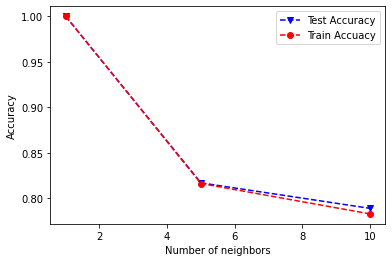

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []
#[:,0]
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x, y)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(x)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
for pred in y_pred[:,0]:
  if pred == 1:
    print(pred, "Exited")
  else:
    print(pred, "Not Exited")

1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 E

In [ ]:
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.777


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(y_test[:,0], y_pred[:,0])
print(confusion)

#plot_confusion_matrix(confusion, data.Class.unique(), title='Confusion matrix', cmap=plt.cm.Blues)

'''
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred)))
print('F1 score on test data is %.2f' % (f1_score(y_test, y_pred)))
print('Precision Score on test data is %.2f' % (precision_score(y_test, y_pred,pos_label='mammals')))
print('Recall score on test data is %.2f' % (recall_score(y_test, y_pred,pos_label='mammals')))
'''

print(classification_report(y_test, y_pred))

[[  20  373]
 [  73 1534]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1607
           1       0.22      0.05      0.08       393

   micro avg       0.78      0.78      0.78      2000
   macro avg       0.51      0.50      0.48      2000
weighted avg       0.69      0.78      0.72      2000
 samples avg       0.78      0.78      0.78      2000



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.6865


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.5325


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.739


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.662


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.764


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.723


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.777


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.749


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.786


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.7685


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8025


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8035


####**Support Vector Machine (SVM) Classifier**####

In [ ]:
dfs = dfc.head(100)
dfs.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x,y = to_xy(dfs,'Exited')

In [ ]:
import sklearn
#from sklearn import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

model = SVC(C=10,kernel='linear')
model.fit(x_train,y_train[:,0])

SVC(C=10, kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy: ", model.score(x_test, y_test[:,0]))

Accuracy:  0.7


####**Decision Tree**####

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier()

In [ ]:
dfsc = dfc.head(100)
dfsc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x,y = to_xy(dfsc,'Exited')

In [ ]:
import sklearn
#from sklearn import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

regressor.fit(x_train,y_train[:,0])

DecisionTreeClassifier()

In [ ]:
y_pred = regressor.predict(x_test)

regressor.fit(x,y)

DecisionTreeClassifier()

In [ ]:
score = regressor.score(x_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 1.0


In [ ]:
X = df.iloc[:, 1:]
X
#X = dfa_concat.iloc[:, :4]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,0,41,1,83807.86,1,0,1,112542.58,0
2,0,0,42,8,159660.80,3,1,0,113931.57,1
3,0,0,39,1,0.00,2,0,0,93826.63,0
4,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,1,39,5,0.00,2,1,0,96270.64,0
9996,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,0,0,36,7,0.00,1,0,1,42085.58,1
9998,1,1,42,3,75075.31,2,1,0,92888.52,1


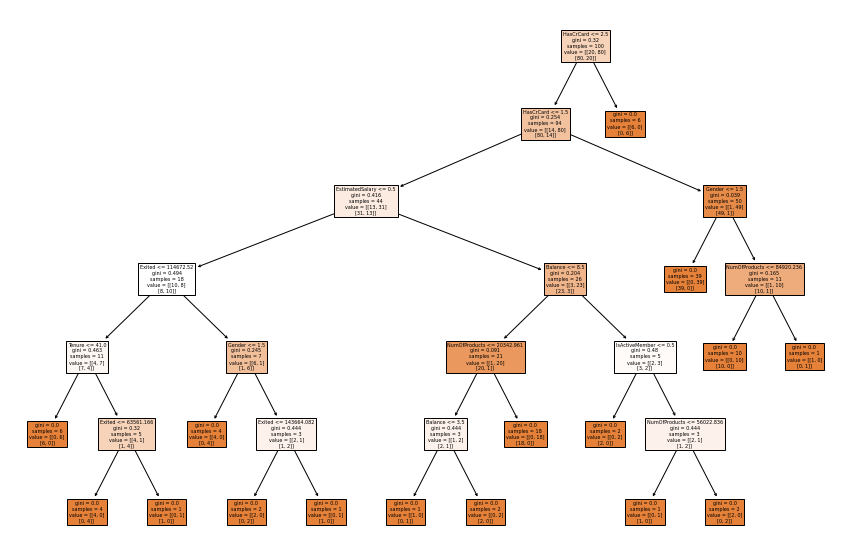

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regressor, feature_names = X.columns, filled = True)

####**Logistic Regression**####

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0, 0.5, 'Accuracy')

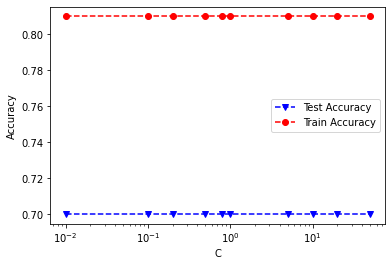

In [ ]:
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x,y[:,0])
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test[:,0], log_reg_pred))
    LRtrainAcc.append(accuracy_score(y[:,0],log_reg_pred_train))
    
plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [ ]:
score = clf.score(x_test, y_test[:,0])
print('Test Accuracy Score', score)

Test Accuracy Score 0.7


In [ ]:
print("Accuracy: ", model.score(x_test, y_test[:,0]))

Accuracy:  0.7
